# Data
* **huge ammount of data from 2008 -2017**
* **time series based dataset - split based on time**


Our Dataset Consist Of 76015 rows and 13 cols namely:
* mid - match id
* date - when matches are played
* venue - place where matches aew played
* bat_team - batting team
* bowl_team - bowling team
* batsman - batsman
* bowler - bowler
* runs - runs scored
* wickets - wickets
* overs - overs - next 3 are based on this
* run_last_5 - runs scored  in last 5 overs
* wicket_last_5 - wickets in last 5 overs
* stricker - batsman playing as main 1
* non-striker - batsman playing as runner up - not main 0
* total - total score **(target variable)**

# Approach

**We can predict as taken team1 , team2 , overs , run , venue , `wickets , previous match for same overs what was the the actual score` , this helps in predicticting total score**

# First Innings Score Predictions

In [25]:
# dependecies
import pandas as pd
import pickle


# loading dataset
df = pd.read_csv('ipl.csv')
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222


# Data Cleaning

In [26]:
# Removing unwanted cols - reduce memory size
cols_to_remove = ['mid' , 'venue' , 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=cols_to_remove , axis=1 , inplace = True)



In [3]:
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222


In [4]:
# checking for how many batting teams are there
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [5]:
# only keep current team which are present
consistent_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [6]:
# filtering based on consistency
df = df[(df['bat_team'].isin(consistent_team)) & (df['bowl_team'].isin(consistent_team))]

In [7]:
# printing out unique team after filtering
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [8]:
# since for every match one can predict more accurately if one has 5 over data so,
# filtering based on 5 overs
df = df[df['overs']>=5.0]

In [9]:
# converting date cols from string to date time object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# Data Processing

In [10]:
# converting categorical features using 'One Hot Encoding' # for numerical values
cat_df = pd.get_dummies(data = df, columns = ['bat_team' , 'bowl_team'])

In [11]:
# getting cols
cat_df.columns 

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [12]:
# rearranging cols
cat_df = cat_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore','bowl_team_Sunrisers Hyderabad', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']]

In [13]:
# split the data into train and test - based on date column
X_train = cat_df.drop(labels = 'total', axis = 1)[cat_df['date'].dt.year <= 2016]
X_test = cat_df.drop(labels = 'total', axis = 1) [cat_df['date'].dt.year >= 2017]

In [14]:
y_train = cat_df[cat_df['date'].dt.year <= 2016]['total'].values
y_test = cat_df[cat_df['date'].dt.year >= 2017]['total'].values

In [15]:
# since the requirement of our date colum is over so we can drop it
# dropping date column
X_train.drop(labels = 'date', axis = True, inplace = True)
X_test.drop(labels = 'date', axis = True, inplace = True)

# Model Building
- Building model 
- Saving Model Using Pickle

## Lasso Regression Model + Grid Search CV 

In [16]:
# Lasso Regression(Works Slowly) + Grid Search CV 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [17]:
# Loading model object 
lasso = Lasso()

In [18]:
# defining search space for Grid Search Cv
# prams dict
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40]}

In [27]:
# intialize the grid search Cv for searching best alpha
lasso_reg = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error',cv = 5)

# training our model to find best hyperparameters
lasso_reg.fit(X_train, y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.501e+06, tolerance: 2.530e+03
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.471e+06, tolerance: 2.547e+03
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.631e+06, tolerance: 2.668e+03
  model = cd_fast.enet_

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [28]:
# getting bes parameter values
print("Best Score: ",lasso_reg.best_score_)
print("Best Value: ", lasso_reg.best_params_)

Best Score:  -320.8221491835715
Best Value:  {'alpha': 1}


# Prediction 
- Predicting on test data
- Visualizing how predicted data fit to our actual data

In [29]:
# prediction
predict = lasso_reg.predict(X_test)

C:\Users\Rohit\AppData\Local\Temp\ipykernel_15776\1607285902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predict)


<Axes: ylabel='Density'>

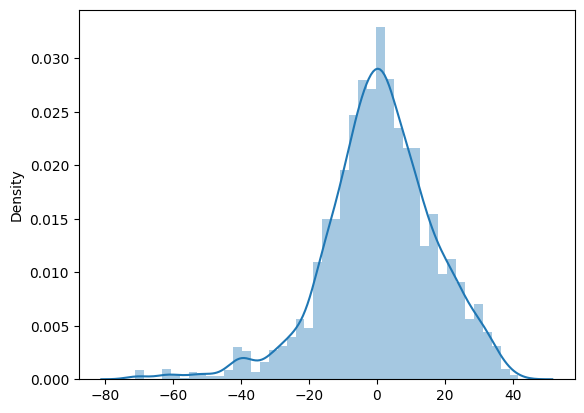

In [30]:
# plottoing our fit
import seaborn as sns
sns.distplot(y_test-predict)

**Better than rest of the approach, except for that ocasional spike - outliers (Can apply some data tranformations)**

In [23]:
# checking for scores
from sklearn import metrics
import numpy as np # dependency

# Mean Absolute Error
print('MAE: ', metrics.mean_absolute_error(y_test , predict))

# Mean Squared Error  
print('MSE: ', metrics.mean_squared_error(y_test, predict))

# Root Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE:  12.213583996827493
MSE:  262.3653827960697
RMSE:  16.197696836157593


**RMSE gone lil bit up , beacuse of randomness involved , but yes giving fairly good predection**

In [24]:
# creating our model pickel file - saving model
file_name = 'ipl_score_predict_lasso_model.pkl'
pickle.dump(lasso_reg , open(file_name,'wb'))